In [28]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import pymc3 as pm

data = pd.read_csv("./EUR_USD_data.csv")
print(data.head())

Date   Price    Open    High     Low  per_change  Days
0  28-Oct-14  1.2734  1.2698  1.2765  1.2683      0.0028     0
1  29-Oct-14  1.2632  1.2735  1.2772  1.2631     -0.0080     1
2  30-Oct-14  1.2613  1.2631  1.2640  1.2547     -0.0015     2
3  31-Oct-14  1.2525  1.2612  1.2618  1.2485     -0.0070     3
4   3-Nov-14  1.2483  1.2515  1.2517  1.2441     -0.0034     4


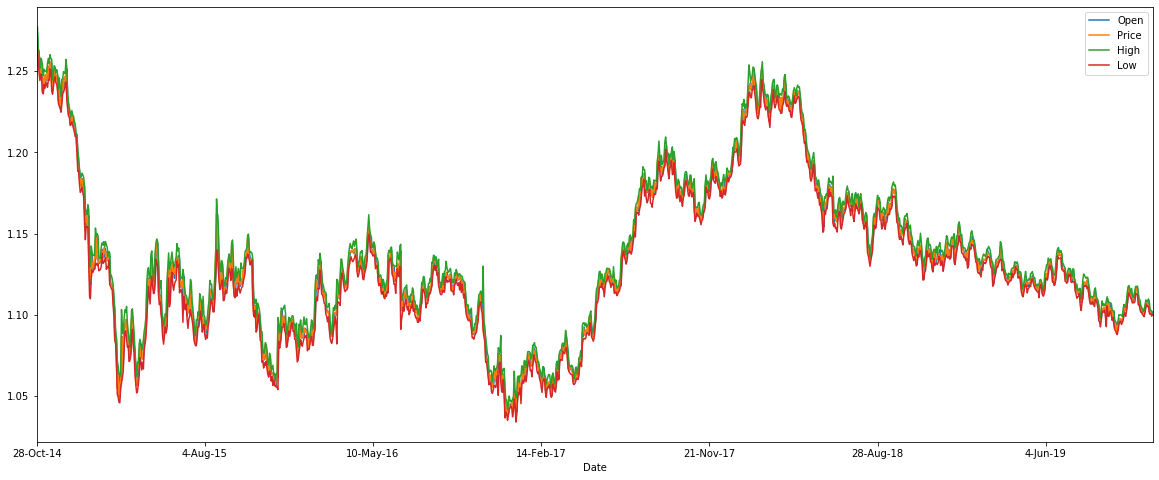

In [29]:

plt.figure(figsize=(20,8))
ax=plt.gca()
data.plot(kind='line',x='Date',y='Open',ax=ax)
data.plot(kind='line',x='Date',y='Price',ax=ax)
data.plot(kind='line',x='Date',y='High',ax=ax)
data.plot(kind='line',x='Date',y='Low',ax=ax)
plt.show()

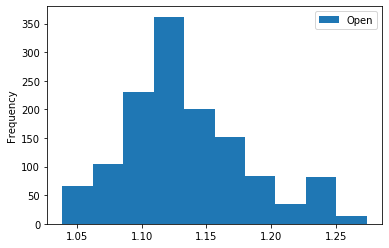

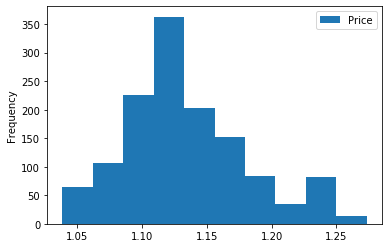

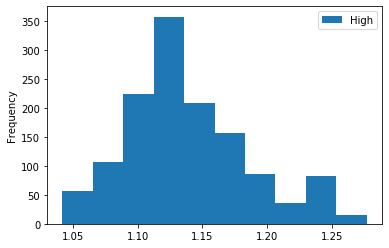

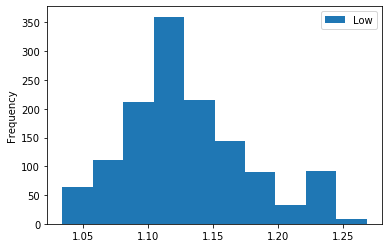

In [30]:
data.plot(kind='hist',x='Date',y='Open')
data.plot(kind='hist',x='Date',y='Price')
data.plot(kind='hist',x='Date',y='High')
data.plot(kind='hist',x='Date',y='Low')

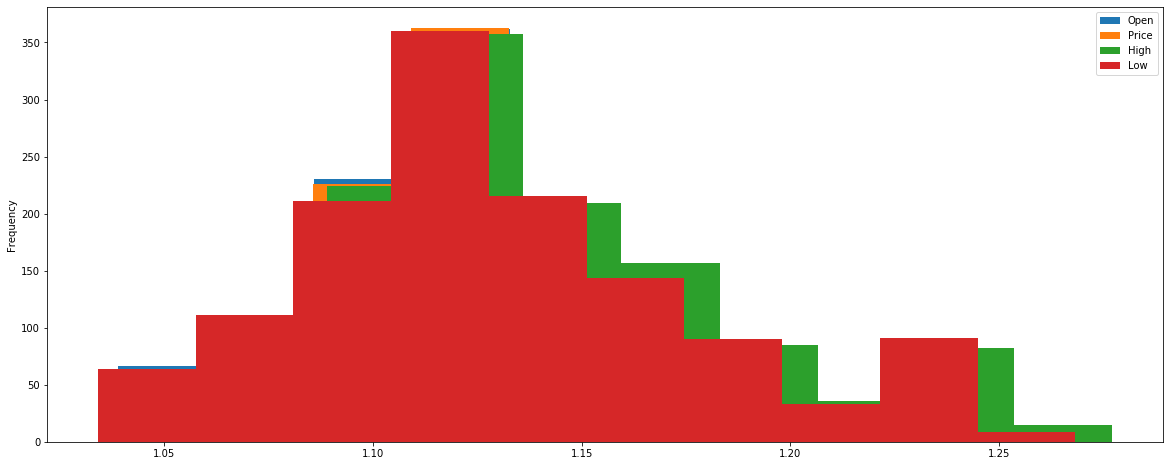

In [31]:
plt.figure(figsize=(20,8))
ax=plt.gca()
data.plot(kind='hist',x='Date',y='Open',ax=ax)
data.plot(kind='hist',x='Date',y='Price',ax=ax)
data.plot(kind='hist',x='Date',y='High',ax=ax)
data.plot(kind='hist',x='Date',y='Low',ax=ax)
plt.show()

In [32]:
X = data.loc[:, ['Open', 'High', 'Low', 'Days']]
y = data.loc[:,'Price']

In [33]:
print(X)

Open    High     Low  Days
0     1.2698  1.2765  1.2683     0
1     1.2735  1.2772  1.2631     1
2     1.2631  1.2640  1.2547     2
3     1.2612  1.2618  1.2485     3
4     1.2515  1.2517  1.2441     4
...      ...     ...     ...   ...
1323  1.1059  1.1087  1.1015  1323
1324  1.1024  1.1033  1.1003  1324
1325  1.1014  1.1027  1.1007  1325
1326  1.1022  1.1022  1.0992  1326
1327  1.1005  1.1009  1.1003  1327

[1328 rows x 4 columns]


In [34]:
print(y)

0       1.2734
1       1.2632
2       1.2613
3       1.2525
4       1.2483
         ...  
1323    1.1024
1324    1.1014
1325    1.1020
1326    1.1005
1327    1.1006
Name: Price, Length: 1328, dtype: float64


In [35]:
from sklearn.datasets import make_friedman2
>>> from sklearn.gaussian_process import GaussianProcessRegressor
>>> from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

In [36]:
X= data[['Open','High','Low']]
X.shape

(1328, 3)

In [37]:
y = data['Price']
y.shape

(1328,)

In [49]:
kernel = DotProduct() + WhiteKernel()
type(kernel)
gpr = GaussianProcessRegressor(kernel=kernel, random_state=0).fit(X, y)


In [39]:
gpr.score(X, y) 

0.997302496867037

In [40]:
A=gpr.predict(X, return_std=True) 

In [41]:
B=pd.DataFrame(list(A))

In [45]:
B = B.transpose()
B.columns = ['a','b']
print(B.head())

a         b
0  1.273600  0.003171
1  1.267664  0.003169
2  1.256626  0.003170
3  1.251008  0.003166
4  1.245284  0.003162


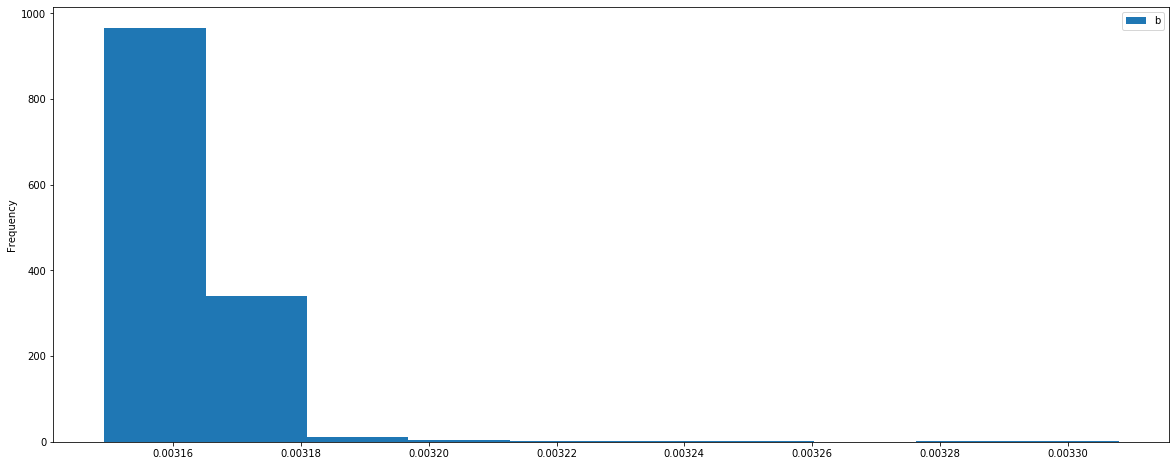

In [50]:
plt.figure(figsize=(20,8))
ax=plt.gca()
B.plot(kind = 'hist', x= 'a',y= 'b',ax=ax)